<a href="https://colab.research.google.com/github/pankajroy97/Web-Scraping-using-Python/blob/main/Web_Scraping_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Importing Matplotlib
import matplotlib.pyplot as plt
# plt is athe alias name for pyplot
import pandas as pd
# pd is the alias for pandas
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.filterwarnings("ignore")

In [79]:
from bs4 import BeautifulSoup

import requests

In [80]:
url='https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

In [81]:
response=requests.get(url)
response

<Response [200]>

In [82]:
soup=BeautifulSoup(response.text,'html.parser')
soup


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Countries where Coronavirus has spread - Worldometer</title>
<meta content="Where is Coronavirus in the world? List of countries with confirmed cases and deaths (total cumulative number) due to the novel coronavirus COVID-19" name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" 

In [83]:
d1=soup.select('td')[0].text
d2=soup.select('td')[1].text
d3=soup.select('td')[2].text
d4=soup.select('td')[3].text
d5=soup.select('td')[4].text
d6=soup.select('td')[5].text
d7=soup.select('td')[6].text
d8=soup.select('td')[7].text
d1,d2,d3,d4,d5,d6,d7,d8

('United States',
 '106,627,427',
 '1,159,824',
 'North America',
 'India',
 '44,939,515',
 '531,508',
 'Asia')

In [84]:
#As all the data is in 'td' tag ,using find_all method to get all the 'td' tags
data_iterator=soup.find_all('td')
data_iterator


[<td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">United States</td>,
 <td style="font-weight: bold; text-align:right">106,627,427</td>,
 <td style="font-weight: bold; text-align:right">1,159,824</td>,
 <td style="font-size:14px; color:#aaa; text-align:right">North America</td>,
 <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">India</td>,
 <td style="font-weight: bold; text-align:right">44,939,515</td>,
 <td style="font-weight: bold; text-align:right">531,508</td>,
 <td style="font-size:14px; color:#aaa; text-align:right">Asia</td>,
 <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">France</td>,
 <td style="font-weight: bold; text-align:right">39,980,570</td>,
 <td style="font-weight: bold; text-align:right">166,556</td>,
 <td style="font-size:14px; color:#aaa; text-align:righ

In [85]:
len(data_iterator)

920

In [86]:
#making empty space
data=[]

In [87]:
for i in range(0,len(data_iterator),4):
  country=soup.select('td')[i].text
  case=soup.select('td')[i+1].text
  death=soup.select('td')[i+2].text
  region=soup.select('td')[i+3].text
  data.append((
      country,
      int(case.replace(',','')),
      int(death.replace(',','')),
      region
  ))  

data

[('United States', 106627427, 1159824, 'North America'),
 ('India', 44939515, 531508, 'Asia'),
 ('France', 39980570, 166556, 'Europe'),
 ('Germany', 38403667, 173044, 'Europe'),
 ('Brazil', 37449418, 701494, 'South America'),
 ('Japan (+Diamond Princess)', 33714729, 74541, 'Asia'),
 ('South Korea', 31157272, 34474, 'Asia'),
 ('Italy', 25788387, 189738, 'Europe'),
 ('United Kingdom', 24555629, 221943, 'Europe'),
 ('Russia', 22845868, 398271, 'Europe'),
 ('Turkey', 17232066, 102174, 'Asia'),
 ('Spain', 13825052, 120715, 'Europe'),
 ('Vietnam', 11559862, 43188, 'Asia'),
 ('Australia', 11441894, 20272, 'Australia/Oceania'),
 ('Taiwan', 10239998, 19005, 'Asia'),
 ('Argentina', 10044957, 130472, 'South America'),
 ('Netherlands', 8610372, 22992, 'Europe'),
 ('Iran', 7606689, 146005, 'Asia'),
 ('Mexico', 7583417, 333876, 'North America'),
 ('Indonesia', 6773146, 161272, 'Asia'),
 ('Poland', 6513804, 119555, 'Europe'),
 ('Colombia', 6364636, 142713, 'South America'),
 ('Austria', 6064670, 2237

In [88]:
# create DataFrame using data by defining thecolumn headers
dataframe=pd.DataFrame(data,columns=['country','case','death','region'])
dataframe

,country,case,death,region
0,United States,106627427,1159824,North America
1,India,44939515,531508,Asia
2,France,39980570,166556,Europe
3,Germany,38403667,173044,Europe
4,Brazil,37449418,701494,South America
...,...,...,...,...
225,Niue,801,0,Australia/Oceania
226,Holy See,29,0,Europe
227,Western Sahara,10,1,Africa
228,MS Zaandam,9,2,


In [92]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  230 non-null    object
 1   case     230 non-null    int64 
 2   death    230 non-null    int64 
 3   region   230 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.3+ KB


In [96]:
df=dataframe.iloc[:,-1:-4:-1]
df

,region,death,case
0,North America,1159824,106627427
1,Asia,531508,44939515
2,Europe,166556,39980570
3,Europe,173044,38403667
4,South America,701494,37449418
...,...,...,...
225,Australia/Oceania,0,801
226,Europe,0,29
227,Africa,1,10
228,,2,9


In [97]:
df.shape

(230, 3)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  230 non-null    object
 1   death   230 non-null    int64 
 2   case    230 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ KB


In [99]:
df.isnull().sum()

region    0
death     0
case      0
dtype: int64

In [101]:
df['region'].unique()

array(['North America', 'Asia', 'Europe', 'South America',
       'Australia/Oceania', 'Africa', ''], dtype=object)

***Total death based on Region***

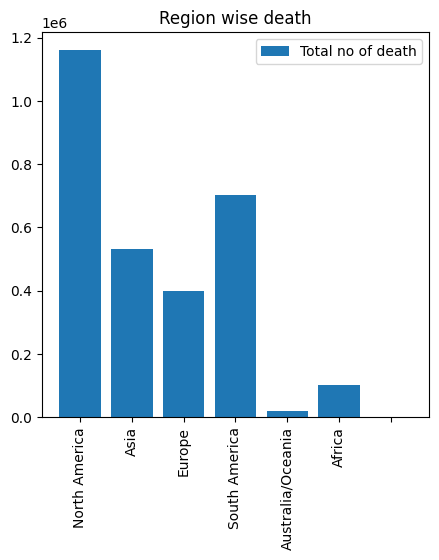

In [119]:
plt.figure(figsize=(5,5))
plt.bar(df['region'],df['death'],label='Total no of death')
plt.xticks(rotation=90)
plt.title('Region wise death')
plt.legend()
plt.show()

In [113]:
x=df.groupby('region')['case'].sum()
x

region
                             9
Africa                12818579
Asia                 216511571
Australia/Oceania     14171874
Europe               248820530
North America        126167002
South America         68557625
Name: case, dtype: int64

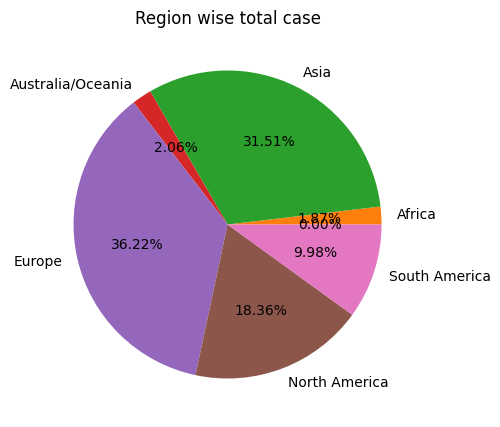

In [117]:
plt.figure(figsize=(5,5))
plt.pie(x=x.values,labels=x.index,autopct='%.2f%%')
plt.title('Region wise total case')
plt.show()